In [3]:
from py4hplc import *

b = Batch('data01/batch.config')
b.peaks(samples=['MK14', 'WZ1_40'], channels = ['220','270'], peak_time_range = [[4,20]], outfilename="data01/report1.csv")

Batch file: data01/batch.config
Batch info: testowy batch
Data directory: data01
[1/18] processing: 054_79_MK14 10uL - MWD 2.1L- Channel 1.txt => MK14_210 
[2/18] processing: 054_79_MK14 10uL - MWD 2.1L- Channel 2.txt => MK14_220 
[3/18] processing: 054_79_MK14 10uL - MWD 2.1L- Channel 3.txt => MK14_230 
[4/18] processing: 054_79_MK14 10uL - MWD 2.1L- Channel 4.txt => MK14_240 
[5/18] processing: 054_79_MK14 10uL - MWD 2.1L- Channel 5.txt => MK14_250 
[6/18] processing: 054_79_MK14 10uL - MWD 2.1L- Channel 6.txt => MK14_260 
[7/18] processing: 054_79_MK14 10uL - MWD 2.1L- Channel 7.txt => MK14_270 
[8/18] processing: 054_79_MK14 10uL - RID2.1L- Channel 1.txt => MK14_ri 
[9/18] processing: 055_80_WZ1 20oC - MWD 2.1L- Channel 1.txt => WZ1_40_210 
[10/18] processing: 055_80_WZ1 20oC - MWD 2.1L- Channel 2.txt => WZ1_40_220 
[11/18] processing: 055_80_WZ1 20oC - MWD 2.1L- Channel 3.txt => WZ1_40_230 
[12/18] processing: 055_80_WZ1 20oC - MWD 2.1L- Channel 4.txt => WZ1_40_240 
[13/18] proces

In [4]:
def plot_report(chromatogram, x1, x2):
    
    t = chromatogram.t
    s = chromatogram.s
    bg_a = chromatogram.bg_a
    bg_b = chromatogram.bg_b
    bg_c = chromatogram.bg_c
    p = chromatogram.peaks
    l = chromatogram.l
    
    fig, ax = plt.subplots(figsize=(10,6))
    ax.set_xlim(x1,x2)
    ax.set_ylim(min(s)-max(s)*0.05, max(s)*1.2)
    ax.plot(t,s, label=l)    
    ax.plot(t, bg_a + bg_b*t + bg_c*t**2,'k-', linewidth=1)
    ax.plot(p['t_start'].values(), p['s_start'].values(),'y.')
    ax.plot(p['t_end'].values(), p['s_end'].values(), 'r.')
    ax.plot(p['t_max'].values(), p['s_max'].values(), 'k.')


    for i in p['i_start'].keys():
        tt = t[p['i_start'][i]:p['i_end'][i]]
        ss = p['aa'][i]*tt+p['bb'][i]
        ax.plot(tt,ss,'k-', linewidth=0.5)

    for i in p['i_start'].keys():
            tt = p['t_max'][i]
            if tt>x1 and tt<x2:
                ss = p['s_max'][i]
                area = p['area'][i]
                sss = (ss-ax.get_ylim()[0])/(ax.get_ylim()[1]-ax.get_ylim()[0])
                ttt = (tt-ax.get_xlim()[0])/(ax.get_xlim()[1]-ax.get_xlim()[0])                
                label = "({})\n{:.2f}\n{:.2f}".format(i+1,tt,area)
                ax.text(ttt,sss+0.03,label,horizontalalignment='center',transform=ax.transAxes)
    
    plt.legend()           
    plt.tight_layout()
    #plt.savefig('ch1.png', dpi=300)
    plt.show()


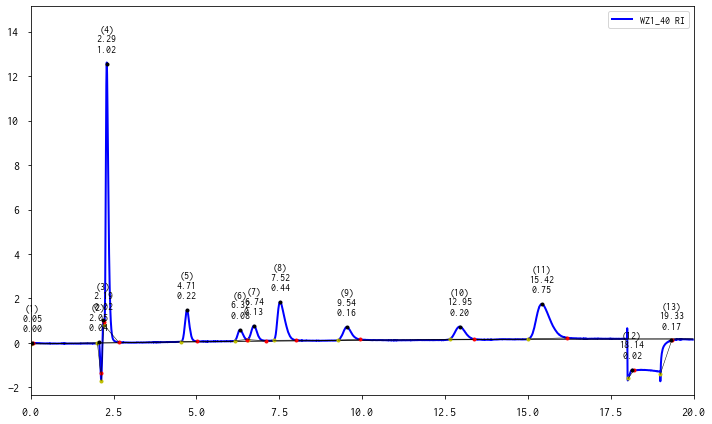

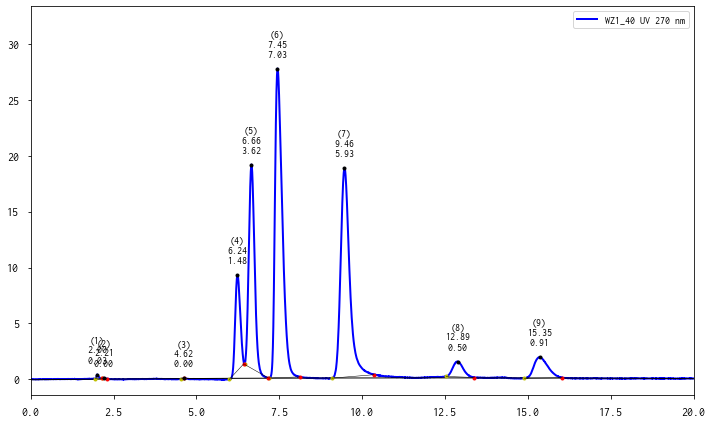

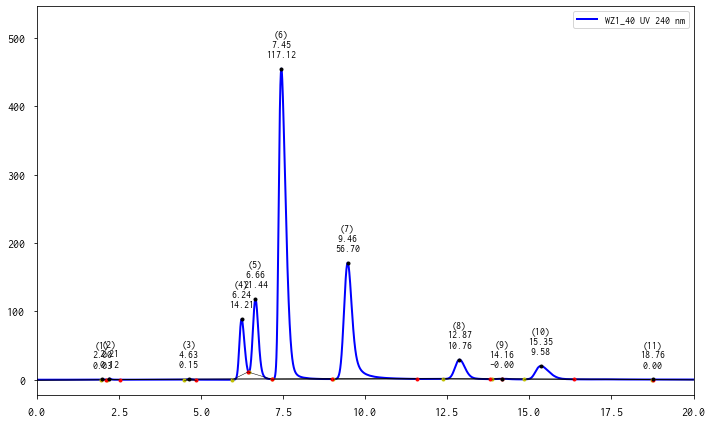

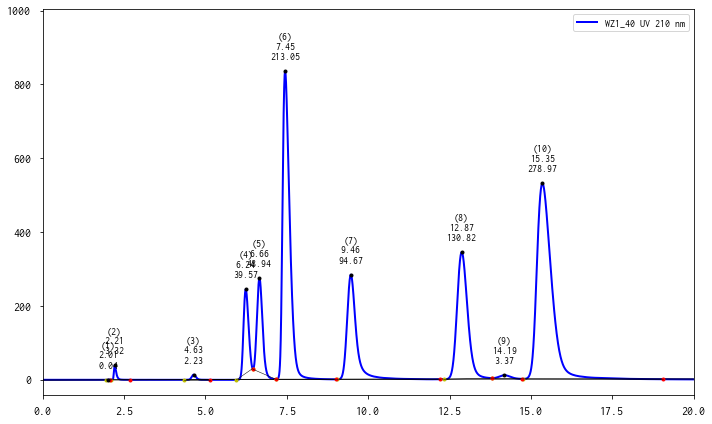

In [5]:
plot_report(b.WZ1_40_ri, 0, 20)
plot_report(b.WZ1_40_270, 0, 20)
plot_report(b.WZ1_40_240, 0, 20)
plot_report(b.WZ1_40_210, 0, 20)


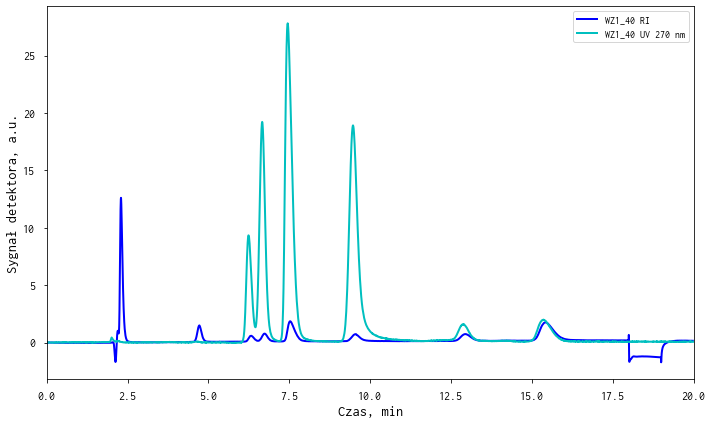

In [6]:
plt.figure(figsize=(10,6))
plt.plot(b.WZ1_40_ri.t, b.WZ1_40_ri.s, label=b.WZ1_40_ri.l)
plt.plot(b.WZ1_40_270.t, b.WZ1_40_270.s, label=b.WZ1_40_270.l)
plt.legend()
plt.xlim(0,20)
#plt.ylim(0,20)
plt.xlabel('Czas, min')
plt.ylabel('Sygnał detektora, a.u.')
#plt.title("Chromatogram wzorca ...")
plt.tight_layout()
plt.savefig('ch1.png', dpi=300)